In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from livelossplot import PlotLossesKeras
np.random.seed(7)
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from keras.layers.embeddings import Embedding
from keras.utils import np_utils
from keras.preprocessing import sequence
from gensim.models import Word2Vec, KeyedVectors, word2vec
import gensim
from gensim.utils import simple_preprocess
from keras.utils import to_categorical
import pickle
import h5py
from time import time
%config Completer.use_jedi = False

E:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [7]:
data1 = pd.read_csv('manual_sentiment_1.csv', index_col=0)
data2 = pd.read_csv('manual_sentiment_2.csv', index_col=0)
data3 = pd.read_csv('manual_sentiment_3.csv', index_col=0)
data4 = pd.read_csv('manual_sentiment_4.csv', index_col=0)

In [12]:
frames = [data1, data2, data3, data4]

result = pd.concat(frames)

In [17]:
result = result.reset_index(drop = True)

In [32]:
data = result.drop(['author','in_reply_to'], axis = 1)

In [44]:
Y = data.sentiment.astype('string')

In [47]:
Y.value_counts()

-1    1688
0      646
1      415
-        2
-q       1
Name: sentiment, dtype: Int64

In [52]:
data.loc[data['sentiment'] == '-']

,text,sentiment
379,"Oczywiście danin, bo podatki nie rosną.",-
605,@__Lewica @gazetapl_news Liczba osob pracujac...,-


In [55]:
data.loc[data['sentiment'] == '-q']

,text,sentiment
2037,NIECH.SAM.ZLORZY.MANDAT.POSLA.Ale.pogibane.ni...,-q


In [62]:
data.loc[2037,'sentiment'] = '-1'
data.loc[379,'sentiment'] = '-1'
data.loc[605,'sentiment'] = '0'

In [63]:
Y = data.sentiment.astype('string')
Y.value_counts()

-1    1691
0      647
1      415
Name: sentiment, dtype: Int64

In [65]:
data.to_csv('manual_sentiment_just_ts.csv')

In [2]:
data = pd.read_csv('manual_sentiment_just_ts.csv', index_col=0)

In [4]:
data

,text,sentiment
0,W 1992r szef PSL brał udział w obaleniu rzadu...,0.0
1,Wladku pamiętamy twoja pomoc. Nam się to po ...,0.0
2,Panie Władeczku. To jakie były ustalenia ws. ...,-1.0
3,Ty zielona szmxxx! https://t.co/s2Am092qEX,-1.0
4,Nigdy nie ma zadowolenia w waszej partii sami...,-1.0
...,...,...
2833,Ciekawe czy za rok rzeszowianie także będą si...,-1.0
2834,Wreszcie pis przegrał,1.0
2835,Biedny Rzeszów. Będzie jak było. Wszędzie tak...,-1.0
2836,@KLubnauer Obowiązek?,0.0


In [5]:
data.sentiment.value_counts()

-1.0    1691
 0.0     647
 1.0     415
Name: sentiment, dtype: int64

In [6]:
data[data.isna().any(axis=1)]

,text,sentiment
415,@pisorgpl Małpują naszych serdecznych wrogów ...,NaN
416,@pisorgpl Aha szkod,NaN
417,@Wojciec62411930 @pisorgpl Jak górnicy chciel...,NaN
418,@pisorgpl I tak przegrają,NaN
419,@Aga34686913 @pisorgpl Na prawdę Pan myślał ż...,NaN
...,...,...
496,Szacun dla posła Grzegorza Brauna.czapki z głów.,NaN
497,"Segregacja odpadów, zielone niebieskie żółte ...",NaN
498,Czy my się tam wszyscy zmieścimy?🙂,NaN
1809,"Pana stać na kino, kowalskie mogą pomarzyć o ...",NaN


In [35]:
pd.options.display.max_rows = 86
pd.set_option('display.max_colwidth', -1)

<ipython-input-35-d80b70fca772>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [57]:
datanull = data[data.isna().any(axis=1)]

In [58]:
datafull = data[-data.isna().any(axis=1)]

In [59]:
datanull

,text,sentiment
415,@pisorgpl Małpują naszych serdecznych wrogów ...,NaN
416,@pisorgpl Aha szkod,NaN
417,@Wojciec62411930 @pisorgpl Jak górnicy chciel...,NaN
418,@pisorgpl I tak przegrają,NaN
419,@Aga34686913 @pisorgpl Na prawdę Pan myślał ż...,NaN
...,...,...
496,Szacun dla posła Grzegorza Brauna.czapki z głów.,NaN
497,"Segregacja odpadów, zielone niebieskie żółte ...",NaN
498,Czy my się tam wszyscy zmieścimy?🙂,NaN
1809,"Pana stać na kino, kowalskie mogą pomarzyć o ...",NaN


In [66]:
sent = (-1,-1,-1,-1,-1,-1,-1,1,0,-1,0,0,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,1,-1,0,0,-1,-1,-1,1,1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,1,0,0,1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,0,-1,-1,-1,1,-1,0,-1,0,-1,-1,0,-1,1,-1,1,1,1,-1,0)

In [61]:
datanull['sentiment'] = sent

<ipython-input-61-4453c9843ab7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanull['sentiment'] = sent


In [62]:
pd.options.display.max_rows = 20
pd.set_option('display.max_colwidth', -1)

<ipython-input-62-f48062af3c90>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [63]:
datanull = datanull.drop([2037])

In [64]:
datanull

,text,sentiment
415,@pisorgpl Małpują naszych serdecznych wrogów zza zachodniej granicy. Te same totalitarne zapędy.,-1
416,@pisorgpl Aha szkod,-1
417,"@Wojciec62411930 @pisorgpl Jak górnicy chcieli protestować w zeszłym roku w Wawie to nagle wybuchła pseudopandemia w kopalniach, stały schemat.",-1
418,@pisorgpl I tak przegrają,-1
419,@Aga34686913 @pisorgpl Na prawdę Pan myślał że zostanie Pan prezydentem? Na prawdę wierzy Pan w demokrację? Wierzył Pan że o tak rządząca mafia odpuści miasto wojewódzkie?,-1
...,...,...
495,"Te wpisy wyglądają dziwnie... Zamiast dać post w stylu ""coś tam coś tam wywiad ze mną"" czy coś i link to Grzegorz Braun... Ja wiem, że nie prowadzi Pan sobie tego konta, ale niech przynajmniej będą jakieś pozory...",-1
496,Szacun dla posła Grzegorza Brauna.czapki z głów.,1
497,"Segregacja odpadów, zielone niebieskie żółte pojemniki. Panie Braun nie trzeba tego przypominać. W Rzeszowie segregujemy od daw",1
498,Czy my się tam wszyscy zmieścimy?🙂,1


In [65]:
datafull

,text,sentiment
0,W 1992r szef PSL brał udział w obaleniu rzadu Olszewskiego i za to został premierem przez 33 dni... w 2021roku szef PSL aspólnie z KO podobno próbował obalić rząd Morawieckiego ale się nie udało zostać premierem.Pawlak górą...,0.0
1,Wladku pamiętamy twoja pomoc. Nam się to po nocach ś,0.0
2,Panie Władeczku. To jakie były ustalenia ws. obalenia rządu? Najpierw obaliliście w parku na ławce z okolicznym menelstwem flaszkę jabola truskawkowego? stąd taki posrany pomysł? He he dwóch nieudaczników.,-1.0
3,Ty zielona szmxxx! https://t.co/s2Am092qEX,-1.0
4,Nigdy nie ma zadowolenia w waszej partii sami chcieliscie emerytury bez podatku teraz brak reakcji tylko dokopac rzadowi ....,-1.0
...,...,...
2832,"Rzeszów\n\n2018:\nOpozycja - 63,76%\nZP - 28,86%\n\n2021:\n\nOpozycja - 56,51%\nZP - 34,33%",-1.0
2833,Ciekawe czy za rok rzeszowianie także będą się tak cieszyć. Wątpię. Ale nie współczuję,-1.0
2834,Wreszcie pis przegrał,1.0
2835,Biedny Rzeszów. Będzie jak było. Wszędzie tak jest. Żal pl,-1.0


In [65]:
frames = [datafull, datanull]

data = pd.concat(frames)

In [69]:
data = data.reset_index()

In [72]:
data = data.drop(['index'], axis = 1)

In [74]:
data.to_csv('cleandata1506.csv')

In [75]:
X = data['text']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [90]:
word2vec_model = gensim.models.word2vec.KeyedVectors.load_word2vec_format('models/nkjp+wiki-lemmas-restricted-100-skipg-hs.txt.gz', binary=False)

In [91]:
word2vec_model.fill_norms()
word2vec_model.get_normed_vectors()

array([[ 0.04398305, -0.01420086,  0.11561302, ..., -0.15856332,
         0.11655073, -0.11977038],
       [-0.07655355,  0.01751726,  0.08462279, ..., -0.10718547,
         0.16806537, -0.17525007],
       [-0.01108653, -0.03108713,  0.10304717, ..., -0.16802649,
         0.17447282, -0.05389635],
       ...,
       [-0.05141278, -0.00841378,  0.0969136 , ..., -0.01573138,
         0.11124421, -0.0329923 ],
       [ 0.04428269,  0.21340252,  0.06089047, ...,  0.05521889,
         0.03234658,  0.1367556 ],
       [ 0.11268829, -0.03742572,  0.11852093, ...,  0.2335457 ,
         0.01037757,  0.04449902]], dtype=float32)

In [92]:
embedding_matrix = word2vec_model.get_normed_vectors()
print('Shape of embedding matrix: ', embedding_matrix.shape)

Shape of embedding matrix:  (1407762, 100)


In [93]:
top_words = embedding_matrix.shape[0]
mxlen = 50
nb_classes = 3

tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(word_index)

X_train = sequence.pad_sequences(sequences_train, maxlen=mxlen)
X_test = sequence.pad_sequences(sequences_test, maxlen=mxlen)
X_val = sequence.pad_sequences(sequences_val, maxlen=mxlen)

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
y_val = np_utils.to_categorical(y_val, nb_classes)

Found 8823 unique tokens.
{'nie': 1, 'i': 2, 'to': 3, 'w': 4, 'na': 5, 'co': 6, 'się': 7, 'z': 8, 'a': 9, 'do': 10, 'jak': 11, 'pan': 12, 't': 13, 'https': 14, 'że': 15, 'jest': 16, 'o': 17, 'po': 18, 'lewica': 19, 'tak': 20, 'warszawa': 21, 'za': 22, 'dla': 23, 'ale': 24, 'czy': 25, 'bo': 26, 'tylko': 27, 'już': 28, 'od': 29, 'ty': 30, 'ma': 31, 'fijokonrad': 32, 'panie': 33, 'będzie': 34, 'teraz': 35, 'tego': 36, 'tym': 37, 'pis': 38, 'polska': 39, 'pana': 40, 'morawieckim': 41, 'joankasw': 42, 'ze': 43, 'pl': 44, 'wtp': 45, 'może': 46, 'coś': 47, '2050': 48, 'wy': 49, 'nic': 50, 'jeszcze': 51, 'partiarazem': 52, 'ten': 53, 'polski': 54, 'też': 55, 'by': 56, 'nawet': 57, 'wiosnabiedronia': 58, 'no': 59, 'te': 60, 'sie': 61, 'było': 62, 'pani': 63, 'am': 64, 'zukowska': 65, 'gdzie': 66, 'ja': 67, 'times': 68, 'jesteś': 69, 'trzeba': 70, 'lat': 71, 'sobie': 72, 'ci': 73, 'news': 74, 'robertbiedron': 75, 'tam': 76, 'przecież': 77, 'są': 78, 'przez': 79, 'chyba': 80, 'gazetapl': 81, 'was

In [94]:
batch_size = 32
nb_epoch = 12

embedding_layer = Embedding(embedding_matrix.shape[0],
                            embedding_matrix.shape[1],
                            weights=[embedding_matrix],
                            trainable=False)

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128, recurrent_dropout=0.5, dropout=0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         140776200 
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 140,893,835
Trainable params: 117,635
Non-trainable params: 140,776,200
_________________________________________________________________


In [100]:
from tensorflow.keras.callbacks import EarlyStopping

stop_early = EarlyStopping(patience = 3)

In [101]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn = model.fit(X_train, y_train, epochs = nb_epoch, batch_size=batch_size, shuffle=True, validation_data=(X_val, y_val), callbacks=[stop_early])
score = model.evaluate(X_val, y_val)
print("Test Loss: %.2f%%" % (score[0]*100))
print("Test Accuracy: %.2f%%" % (score[1]*100))

Epoch 1/12
57/57 [==============================] - 10s 111ms/step - loss: 0.9614 - accuracy: 0.6131 - val_loss: 0.9177 - val_accuracy: 0.6101
Epoch 2/12
57/57 [==============================] - 6s 98ms/step - loss: 0.8935 - accuracy: 0.6255 - val_loss: 0.9130 - val_accuracy: 0.6101
Epoch 3/12
57/57 [==============================] - 5s 96ms/step - loss: 0.8880 - accuracy: 0.6252 - val_loss: 0.9073 - val_accuracy: 0.6454
Epoch 4/12
57/57 [==============================] - 5s 96ms/step - loss: 0.8808 - accuracy: 0.6238 - val_loss: 0.9128 - val_accuracy: 0.6145
Epoch 5/12
57/57 [==============================] - 7s 128ms/step - loss: 0.8778 - accuracy: 0.6386 - val_loss: 0.9179 - val_accuracy: 0.6035
Epoch 6/12
15/15 [==============================] - 0s 12ms/step - loss: 0.9381 - accuracy: 0.6035
Test Loss: 93.81%
Test Accuracy: 60.35%


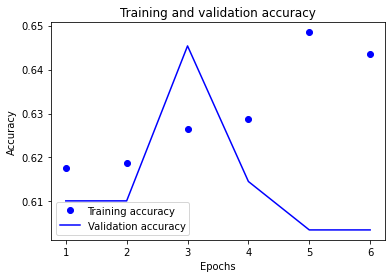

In [103]:
acc = rnn.history['accuracy']
val_acc = rnn.history['val_accuracy']
epochs = range(1,7)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

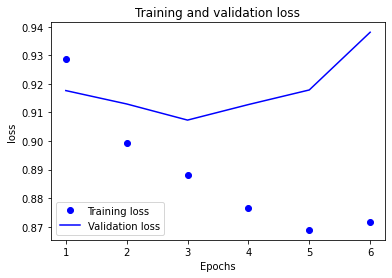

In [104]:
acc = rnn.history['loss']
val_acc = rnn.history['val_loss']
epochs = range(1,7)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

In [105]:
y_test

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [108]:
model.predict(X_test)

array([[0.40432888, 0.15833983, 0.43733123],
       [0.2923182 , 0.15893228, 0.54874957],
       [0.39670774, 0.18326227, 0.42003   ],
       ...,
       [0.25895524, 0.13667442, 0.6043703 ],
       [0.3295698 , 0.23267965, 0.43775052],
       [0.3745341 , 0.13896169, 0.4865042 ]], dtype=float32)

# 24 06

In [7]:
data = pd.read_csv('manual_sentiment_just_ts.csv', index_col=0)

In [9]:
data2 = pd.read_csv('manual_sentiment_5.csv', index_col=0)

In [12]:
data2

,text,sentiment
0,"Ustawił Pana ojciec, prawda?",-1.0
1,Ze ma syna gamonia ? 😂😂😂,-1.0
2,Ładny chłopczyk.,1.0
3,Za czasów rządów w PZPR?,-1.0
4,Przecież to @RyszardKal,0.0
...,...,...
1051,@miasto_rzeszow @RzeszowNews @rzeszow112 @Kur...,1.0
1052,@KTruskolaski @miasto_rzeszow Był hymn niemie...,-1.0
1053,@miasto_rzeszow 💪💪💪,1.0
1054,@miasto_rzeszow To co wczasy teraz,1.0


In [11]:
data2 = data2.drop(['author','in_reply_to'], axis = 1)

In [17]:
data2[data2.isna().any(axis=1)]

,text,sentiment
388,@Wiktor47030158 @MorawieckiM @MF_GOV_PL @PIE_...,NaN


In [19]:
data2.loc[388,'text']

' @Wiktor47030158 @MorawieckiM @MF_GOV_PL @PIE_NET_PL Szczerze powiedziawszy, to myślałem, że do Morawieckiego pisze się na pinokio @ https://t.co/uGlxqbslvc.'

In [20]:
data2.loc[388,'sentiment'] = '-1'

In [22]:
frames = [data, data2]

result = pd.concat(frames)

In [26]:
result = result.reset_index()

In [27]:
result

,index,text,sentiment
0,0,W 1992r szef PSL brał udział w obaleniu rzadu...,0
1,1,Wladku pamiętamy twoja pomoc. Nam się to po ...,0
2,2,Panie Władeczku. To jakie były ustalenia ws. ...,-1
3,3,Ty zielona szmxxx! https://t.co/s2Am092qEX,-1
4,4,Nigdy nie ma zadowolenia w waszej partii sami...,-1
...,...,...,...
3889,1051,@miasto_rzeszow @RzeszowNews @rzeszow112 @Kur...,1
3890,1052,@KTruskolaski @miasto_rzeszow Był hymn niemie...,-1
3891,1053,@miasto_rzeszow 💪💪💪,1
3892,1054,@miasto_rzeszow To co wczasy teraz,1


In [28]:
result = result.drop(['index'], axis = 1)

In [55]:
result[result.isna().any(axis=1)]

,text,sentiment
415,@pisorgpl Małpują naszych serdecznych wrogów ...,NaN
416,@pisorgpl Aha szkod,NaN
417,@Wojciec62411930 @pisorgpl Jak górnicy chciel...,NaN
418,@pisorgpl I tak przegrają,NaN
419,@Aga34686913 @pisorgpl Na prawdę Pan myślał ż...,NaN
...,...,...
495,Te wpisy wyglądają dziwnie... Zamiast dać pos...,NaN
496,Szacun dla posła Grzegorza Brauna.czapki z głów.,NaN
497,"Segregacja odpadów, zielone niebieskie żółte ...",NaN
498,Czy my się tam wszyscy zmieścimy?🙂,NaN


In [67]:
datanull = result[result.isna().any(axis=1)]

In [69]:
sent = (-1,-1,-1,-1,-1,-1,-1,1,0,-1,0,0,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,1,-1,0,0,-1,-1,-1,1,1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,1,0,0,1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,0,-1,-1,-1,1,-1,0,-1,0,-1,-1,0,-1,1,-1,1,1,1,-1)

In [70]:
datanull['sentiment'] = sent

<ipython-input-70-4453c9843ab7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanull['sentiment'] = sent


In [71]:
datafull = result[-result.isna().any(axis=1)]

In [72]:
frames = [datafull, datanull]

data = pd.concat(frames)

In [76]:
data = data.reset_index()

In [77]:
result = data.drop(['index'], axis = 1)

In [78]:
result.to_csv('cleandata2406.csv', index=False)

In [79]:
result['text'] = result['text'].astype(str)

In [80]:
result

,text,sentiment
0,W 1992r szef PSL brał udział w obaleniu rzadu Olszewskiego i za to został premierem przez 33 dni... w 2021roku szef PSL aspólnie z KO podobno próbował obalić rząd Morawieckiego ale się nie udało zostać premierem.Pawlak górą...,0
1,Wladku pamiętamy twoja pomoc. Nam się to po nocach ś,0
2,Panie Władeczku. To jakie były ustalenia ws. obalenia rządu? Najpierw obaliliście w parku na ławce z okolicznym menelstwem flaszkę jabola truskawkowego? stąd taki posrany pomysł? He he dwóch nieudaczników.,-1
3,Ty zielona szmxxx! https://t.co/s2Am092qEX,-1
4,Nigdy nie ma zadowolenia w waszej partii sami chcieliscie emerytury bez podatku teraz brak reakcji tylko dokopac rzadowi ....,-1
...,...,...
3889,"Te wpisy wyglądają dziwnie... Zamiast dać post w stylu ""coś tam coś tam wywiad ze mną"" czy coś i link to Grzegorz Braun... Ja wiem, że nie prowadzi Pan sobie tego konta, ale niech przynajmniej będą jakieś pozory...",-1
3890,Szacun dla posła Grzegorza Brauna.czapki z głów.,1
3891,"Segregacja odpadów, zielone niebieskie żółte pojemniki. Panie Braun nie trzeba tego przypominać. W Rzeszowie segregujemy od daw",1
3892,Czy my się tam wszyscy zmieścimy?🙂,1


In [81]:
X = result['text']
y = result['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [34]:
word2vec_model = gensim.models.word2vec.KeyedVectors.load_word2vec_format('models/nkjp+wiki-lemmas-restricted-100-skipg-hs.txt.gz', binary=False)

word2vec_model.fill_norms()
word2vec_model.get_normed_vectors()

array([[ 0.04398305, -0.01420086,  0.11561302, ..., -0.15856332,
         0.11655073, -0.11977038],
       [-0.07655355,  0.01751726,  0.08462279, ..., -0.10718547,
         0.16806537, -0.17525007],
       [-0.01108653, -0.03108713,  0.10304717, ..., -0.16802649,
         0.17447282, -0.05389635],
       ...,
       [-0.05141278, -0.00841378,  0.0969136 , ..., -0.01573138,
         0.11124421, -0.0329923 ],
       [ 0.04428269,  0.21340252,  0.06089047, ...,  0.05521889,
         0.03234658,  0.1367556 ],
       [ 0.11268829, -0.03742572,  0.11852093, ...,  0.2335457 ,
         0.01037757,  0.04449902]], dtype=float32)

In [82]:
embedding_matrix = word2vec_model.get_normed_vectors()
print('Shape of embedding matrix: ', embedding_matrix.shape)

Shape of embedding matrix:  (1407762, 100)


In [83]:
top_words = embedding_matrix.shape[0]
mxlen = 50
nb_classes = 3

tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(word_index)

X_train = sequence.pad_sequences(sequences_train, maxlen=mxlen)
X_test = sequence.pad_sequences(sequences_test, maxlen=mxlen)
X_val = sequence.pad_sequences(sequences_val, maxlen=mxlen)

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
y_val = np_utils.to_categorical(y_val, nb_classes)

Found 11489 unique tokens.
{'to': 1, 'nie': 2, 'i': 3, 'w': 4, 'co': 5, 'się': 6, 'na': 7, 'z': 8, 'a': 9, 'do': 10, 'jak': 11, 'pan': 12, 'że': 13, 't': 14, 'https': 15, 'jest': 16, 'o': 17, 'tak': 18, 'po': 19, 'za': 20, 'lewica': 21, 'ale': 22, 'tylko': 23, 'już': 24, 'pis': 25, 'dla': 26, 'bo': 27, 'czy': 28, 'warszawa': 29, 'od': 30, 'ty': 31, 'ma': 32, 'panie': 33, 'tym': 34, 'będzie': 35, 'może': 36, 'pana': 37, 'tego': 38, 'ze': 39, 'teraz': 40, 'fijokonrad': 41, 'polska': 42, 'morawieckim': 43, 'tam': 44, 'ja': 45, 'jeszcze': 46, 'ten': 47, 'coś': 48, 'też': 49, 'joankasw': 50, 'są': 51, 'gdzie': 52, 'było': 53, 'wy': 54, 'radio': 55, 'sobie': 56, 'lat': 57, 'być': 58, 'te': 59, 'żeby': 60, 'jesteś': 61, 'no': 62, 'nawet': 63, 'pl': 64, 'by': 65, 'sie': 66, 'chyba': 67, 'wtp': 68, 'polski': 69, 'partiarazem': 70, 'ci': 71, 'trzeba': 72, 'nic': 73, 'przez': 74, 'bez': 75, '2050': 76, 'agabak': 77, 'pani': 78, 'kto': 79, 'news': 80, 'was': 81, 'pod': 82, 'ta': 83, 'można': 84, '

In [84]:
batch_size = 32
nb_epoch = 12

embedding_layer = Embedding(embedding_matrix.shape[0],
                            embedding_matrix.shape[1],
                            weights=[embedding_matrix],
                            trainable=False)

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128, recurrent_dropout=0.5, dropout=0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         140776200 
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 140,893,835
Trainable params: 117,635
Non-trainable params: 140,776,200
_________________________________________________________________


In [85]:
from tensorflow.keras.callbacks import EarlyStopping
stop_early = EarlyStopping(patience = 4)

In [86]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn = model.fit(X_train, y_train, epochs = nb_epoch, batch_size=batch_size, shuffle=True, validation_data=(X_val, y_val))#, callbacks=[stop_early])
score = model.evaluate(X_val, y_val)
print("Test Loss: %.2f%%" % (score[0]*100))
print("Test Accuracy: %.2f%%" % (score[1]*100))

Epoch 1/12
78/78 [==============================] - 11s 106ms/step - loss: 0.9332 - accuracy: 0.6140 - val_loss: 0.8802 - val_accuracy: 0.6292
Epoch 2/12
78/78 [==============================] - 7s 92ms/step - loss: 0.8871 - accuracy: 0.6358 - val_loss: 0.8746 - val_accuracy: 0.6292
Epoch 3/12
78/78 [==============================] - 7s 94ms/step - loss: 0.8821 - accuracy: 0.6430 - val_loss: 0.8656 - val_accuracy: 0.6677
Epoch 4/12
78/78 [==============================] - 8s 97ms/step - loss: 0.8492 - accuracy: 0.6572 - val_loss: 0.8571 - val_accuracy: 0.6726
Epoch 5/12
78/78 [==============================] - 7s 91ms/step - loss: 0.8397 - accuracy: 0.6634 - val_loss: 0.8510 - val_accuracy: 0.6758
Epoch 6/12
78/78 [==============================] - 7s 91ms/step - loss: 0.8305 - accuracy: 0.6729 - val_loss: 0.8502 - val_accuracy: 0.6629
Epoch 7/12
78/78 [==============================] - 7s 91ms/step - loss: 0.8308 - accuracy: 0.6783 - val_loss: 0.8690 - val_accuracy: 0.6533
Epoch 8/12


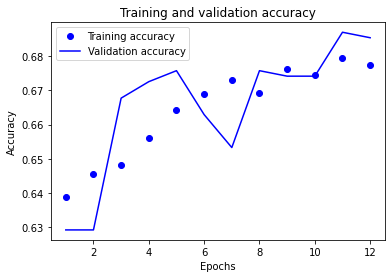

In [90]:
acc = rnn.history['accuracy']
val_acc = rnn.history['val_accuracy']
epochs = range(1,13)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

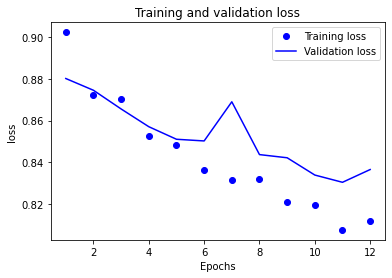

In [91]:
acc = rnn.history['loss']
val_acc = rnn.history['val_loss']
epochs = range(1,13)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

<AxesSubplot:>

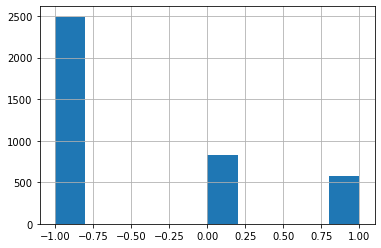

In [96]:
result.sentiment.astype('float').hist()